In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from scipy.stats import sem
from scipy.stats import linregress
from matplotlib.cm import viridis
from matplotlib.colors import to_hex

from matplotlib.pyplot import figure
#script for font management
import matplotlib as mpl
#import gmaps
#import gmaps.datasets
#import gmaps.geojson_geometries



# add developer API key
#from config import gkey

# Configure gmaps
#gmaps.configure(api_key=gkey)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

# File to Load (Remember to Change These)
dataset_2016 = "dataset/2016.csv"
dataset_2017 = "dataset/2017.csv"
dataset_2018 = "dataset/2018.csv"
country_region = "dataset/Country_Region.csv"
country_lat_lon = "dataset/countries_location.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
dataset_2016_df = pd.read_csv(dataset_2016)
dataset_2017_df = pd.read_csv(dataset_2017)
dataset_2018_df = pd.read_csv(dataset_2018)
country_region = pd.read_csv(country_region)
country_lat_lon_df = pd.read_csv(country_lat_lon)

# Combine the data into a single dataset
merge_2016_2017_df = pd.merge(dataset_2016_df, dataset_2017_df , on="Country")

merge_2016_2017_df = merge_2016_2017_df.rename(columns={"Happiness Rank_x":"2016 Happiness Rank", "Happiness Score_x":"2016 Happiness Score", "Economy (GDP per Capita)_x":"2016 Economy (GDP per Capita)", "Health (Life Expectancy)_x":"2016 Health (Life Expectancy)", "Freedom_x":"2016 Freedom"})
merge_2016_2017_df = merge_2016_2017_df.rename(columns={"Happiness Rank_y":"2017 Happiness Rank", "Happiness Score_y":"2017 Happiness Score", "Economy (GDP per Capita)_y":"2017 Economy (GDP per Capita)", "Health (Life Expectancy)_y":"2017 Health (Life Expectancy)", "Freedom_y":"2017 Freedom"})



merge_dataset_df = pd.merge(merge_2016_2017_df, dataset_2018_df , on="Country")
merge_dataset_df = merge_dataset_df.rename(columns={"Rank":"2018 Happiness Rank", "Score":"2018 Happiness Score", "GDP_Per_Capita":"2018 Economy (GDP per Capita)", "Healthy_Life_Expectancy":"2018 Health (Life Expectancy)", "Freedom_To_Make_Life_Choices":"2018 Freedom"})

#add region to merged file
merge_region_df = pd.merge(merge_dataset_df, country_region, on="Country", how="left") 
# Display the data table for preview
# combined_data_df["Mouse ID"].value_counts()

#add latitude and longitude to merge_region_df, see data frame in Map graph
merged_lat_lon_df = pd.merge(merge_region_df, country_lat_lon_df, on="Country", how="left")



#merge_region_df.head()
list(merge_dataset_df.columns)


['Country',
 '2016 Happiness Rank',
 '2016 Happiness Score',
 '2016 Economy (GDP per Capita)',
 '2016 Health (Life Expectancy)',
 '2016 Freedom',
 '2017 Happiness Rank',
 '2017 Happiness Score',
 '2017 Economy (GDP per Capita)',
 '2017 Health (Life Expectancy)',
 '2017 Freedom',
 '2018 Happiness Rank',
 '2018 Happiness Score',
 '2018 Economy (GDP per Capita)',
 'Social_Support',
 '2018 Health (Life Expectancy)',
 '2018 Freedom',
 'Generosity',
 'Perceptions_Of_Corruption',
 'Residual']

## 2018 Graphs for Happiness vs. ......

Current size: [6.0, 4.0]


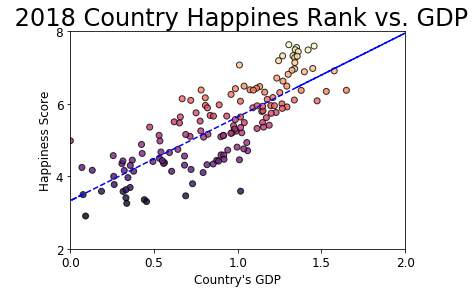

In [13]:
#Happiness vs. GDP 


# Set line for regression analysis
# Set line
(slope, intercept, _, _, _) = linregress(merge_dataset_df["2018 Economy (GDP per Capita)"], 
                                         merge_dataset_df["2018 Happiness Score"])

fit = slope * merge_dataset_df["2018 Economy (GDP per Capita)"] + intercept


#Build scatter plot for Happiness vs. GDP
plt.scatter(merge_dataset_df["2018 Economy (GDP per Capita)"], 
            merge_dataset_df["2018 Happiness Score"], c=merge_dataset_df["2018 Happiness Score"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='magma', alpha=0.8, label="City")

plt.plot(merge_dataset_df["2018 Economy (GDP per Capita)"], fit, 'b--')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print("Current size:", fig_size)

mpl.rcParams.update({
    'figure.figsize'      : (10,12),
    'font.size'           :  20.0,    
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'large',
    'xtick.labelsize'     : 'large',
    'ytick.labelsize'     : 'large',
    'legend.fontsize'     : 'large',
    'legend.loc'          : 'upper left'
})

#Add lables to scatter plot
plt.title(" 2018 Country Happines Rank vs. GDP")
plt.xlabel("Country's GDP")
plt.ylabel("Happiness Score")
plt.xlim([0, 2])
plt.ylim([2,8])

#Save figure
plt.savefig("Happy_v_GDP.png")

#show plot
plt.show()

In [ ]:
#%matplotlib notebook


#from ggplot import *

#ggplot( aes(x = 'Country', y = '2016 Happiness Score'), data = merge_dataset_df) + geom_boxplot()

Current size: [10.0, 12.0]


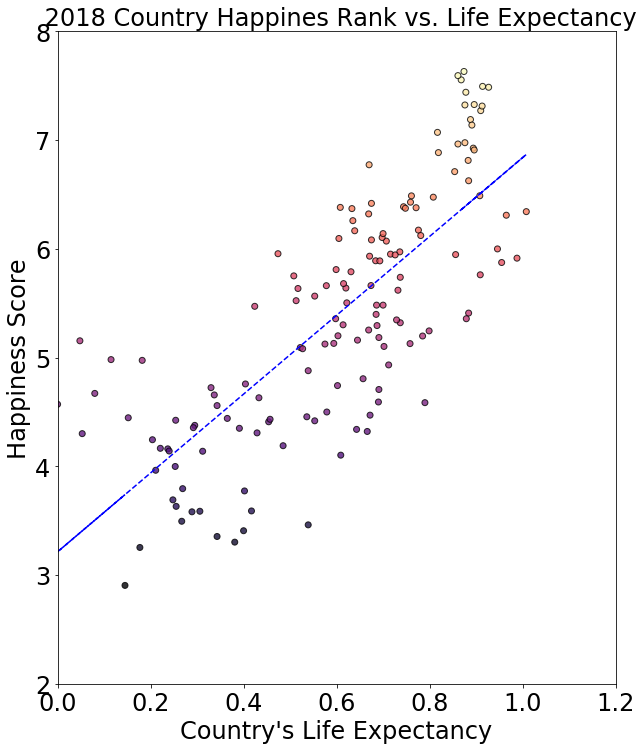

In [14]:
#Happiness vs. Life Expectancy 


# Set line for regression analysis
# Set line
(slope, intercept, _, _, _) = linregress(merge_dataset_df["2018 Health (Life Expectancy)"], 
                                         merge_dataset_df["2018 Happiness Score"])

fit = slope * merge_dataset_df["2018 Health (Life Expectancy)"] + intercept


#Build scatter plot for Happiness vs. GDP
plt.scatter(merge_dataset_df["2018 Health (Life Expectancy)"], 
            merge_dataset_df["2018 Happiness Score"], c=merge_dataset_df["2018 Happiness Score"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='magma', alpha=0.8, label="City")

plt.plot(merge_dataset_df["2018 Health (Life Expectancy)"], fit, 'b--')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print("Current size:", fig_size)

mpl.rcParams.update({
    'figure.figsize'      : (14,12),
    'font.size'           :  20.0,    
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'large',
    'xtick.labelsize'     : 'large',
    'ytick.labelsize'     : 'large',
    'legend.fontsize'     : 'large',
    'legend.loc'          : 'upper left'
})

#Add lables to scatter plot
plt.title(" 2018 Country Happines Rank vs. Life Expectancy")
plt.xlabel("Country's Life Expectancy")
plt.ylabel("Happiness Score")
plt.xlim([0, 1.2])
plt.ylim([2,8])

#Save figure
plt.savefig("Happy_v_life.png")

#show plot
plt.show()

Current size: [6.0, 4.0]


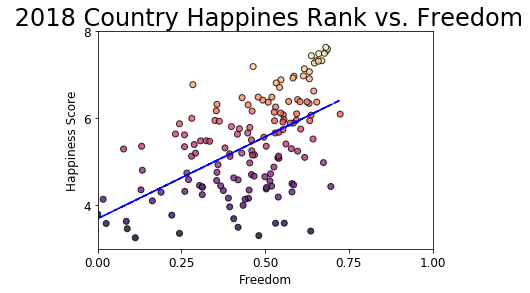

In [17]:
#Happiness vs. Freedom 


# Set line for regression analysis
# Set line
(slope, intercept, _, _, _) = linregress(merge_dataset_df["2018 Freedom"], 
                                         merge_dataset_df["2018 Happiness Score"])

fit = slope * merge_dataset_df["2018 Freedom"] + intercept


#Build scatter plot for Happiness vs. GDP
plt.scatter(merge_dataset_df["2018 Freedom"], 
            merge_dataset_df["2018 Happiness Score"], c=merge_dataset_df["2018 Happiness Score"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='magma', alpha=0.8)

plt.plot(merge_dataset_df["2018 Freedom"], fit, 'b--')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print("Current size:", fig_size)

mpl.rcParams.update({
    'figure.figsize'      : (10,12),
    'font.size'           :  20.0,    
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'large',
    'xtick.labelsize'     : 'large',
    'ytick.labelsize'     : 'large',
    'legend.fontsize'     : 'large',
    'legend.loc'          : 'upper left'
})

#Add lables to scatter plot
plt.title(" 2018 Country Happines Rank vs. Freedom")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.xlim([0, 1])
plt.ylim([3,8])

#Save figure
plt.savefig("Happy_v_freedom.png")

#show plot
plt.show()

Current size: [26.0, 18.0]


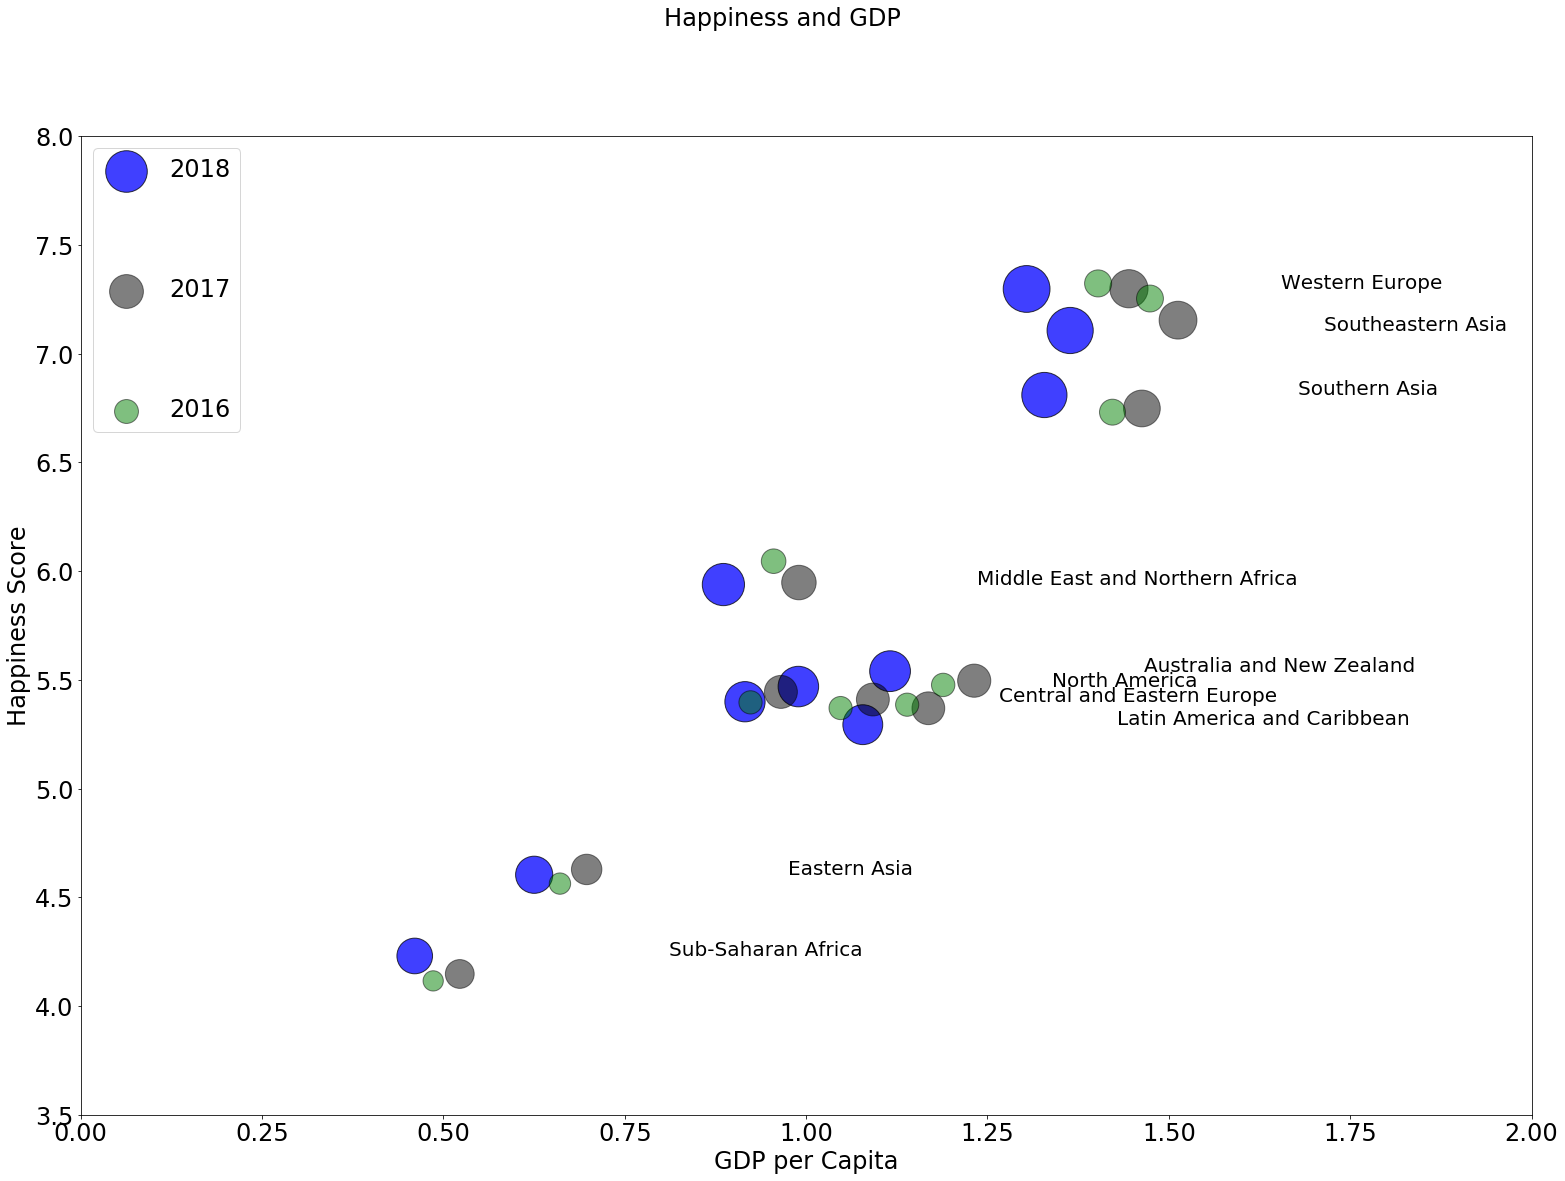

In [19]:
# Build the scatter plots for each city types(x_axis, y,axis, s=size)

happiness_per_country_2018 = merge_region_df.groupby(['Region'])['2018 Happiness Score'].mean()
GDP_per_country_2018 = merge_region_df.groupby(['Region'])['2018 Economy (GDP per Capita)'].mean()
life_exp_country_2018 = merge_region_df.groupby(['Region'])['2018 Health (Life Expectancy)'].mean()

happiness_per_country_2017 = merge_region_df.groupby(['Region'])['2017 Happiness Score'].mean()
GDP_per_country_2017 = merge_region_df.groupby(['Region'])['2017 Economy (GDP per Capita)'].mean()
life_exp_country_2017 = merge_region_df.groupby(['Region'])['2017 Health (Life Expectancy)'].mean()

happiness_per_country_2016 = merge_region_df.groupby(['Region'])['2016 Happiness Score'].mean()
GDP_per_country_2016 = merge_region_df.groupby(['Region'])['2016 Economy (GDP per Capita)'].mean()
life_exp_country_2016 = merge_region_df.groupby(['Region'])['2016 Health (Life Expectancy)'].mean()




#add text to labels
for i,region in enumerate(merge_region_df['Region'].unique()):
    x = GDP_per_country_2018[i]
    y = happiness_per_country_2018[i]
    plt.text(x+.35, y, region)
plt.scatter(GDP_per_country_2018, happiness_per_country_2018, s = happiness_per_country_2018*300, marker ='o', facecolor="Blue", 
            edgecolors='black', label="2018 by Country", alpha=0.75)
                        
                        
plt.scatter(GDP_per_country_2017, happiness_per_country_2017, s = happiness_per_country_2017*200, marker ='o', facecolor="Black", alpha=0.5, label="2017 by Country")
plt.scatter(GDP_per_country_2016, happiness_per_country_2016, s = happiness_per_country_2016*100, marker ='o', facecolor="Green", edgecolors='black', alpha=0.5, label="2016 by Country")


# Incorporate the other graph properties
#set x & y limits
plt.xlim(0,2)
plt.ylim(3.5,8)

#Add title descriptions
plt.suptitle("Happiness and GDP")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
#plt.rcParams["figure.figsize"] = fig_size
#fig_size[0] = 20
#fig_size[1] = 10

mpl.rcParams.update({
    'figure.figsize'      : (26,18),
    'font.size'           :  20.0,    
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'large',
    'xtick.labelsize'     : 'large',
    'ytick.labelsize'     : 'large',
    'legend.fontsize'     : 'large',
    'legend.loc'          : 'upper left'
})


# Create a legendswwqd
legend = ["2018", "2017", "2016"]
plt.legend(legend, labelspacing = 4, markerscale=1)
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Happiness Bubble Chart")
plt.show()